<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [4]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
movies.duration.sort_values().head()

389    64
338    66
258    67
293    68
88     68
Name: duration, dtype: int64

In [8]:
# shortest is the 389: Freaks
movies.loc[389]

star_rating                                                       8
title                                                        Freaks
content_rating                                              UNRATED
genre                                                         Drama
duration                                                         64
actors_list       [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...
Name: 389, dtype: object

In [9]:
# highest to lower
movies.duration.sort_values(ascending = False).head(1)

476    242
Name: duration, dtype: int64

In [10]:
# longest is the 476: Hamlet
movies.loc[476]

star_rating                                                     7.8
title                                                        Hamlet
content_rating                                                PG-13
genre                                                         Drama
duration                                                        242
actors_list       [u'Kenneth Branagh', u'Julie Christie', u'Dere...
Name: 476, dtype: object

#### Create a histogram of duration, choosing an "appropriate" number of bins.

Text(0.5,1,'duration')

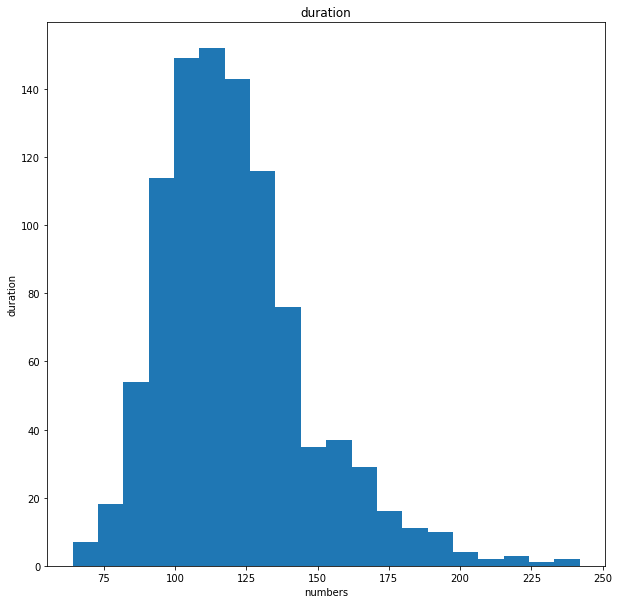

In [11]:
# Answer:
movies.duration.sort_values().plot(kind='hist',bins=20, figsize=(10,10));
plt.xlabel('numbers')
plt.ylabel('duration')
plt.title('duration')

#### Use a box plot to display that same data.

In [12]:
# Answer:
import seaborn as sns


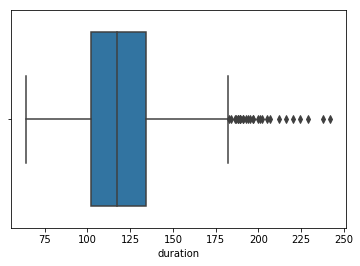

In [13]:
sns.boxplot(movies.duration.sort_values())

## Intermediate level

#### Count how many movies have each of the content ratings.

In [14]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [15]:
# 3 nulls
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5,1,'content ratings')

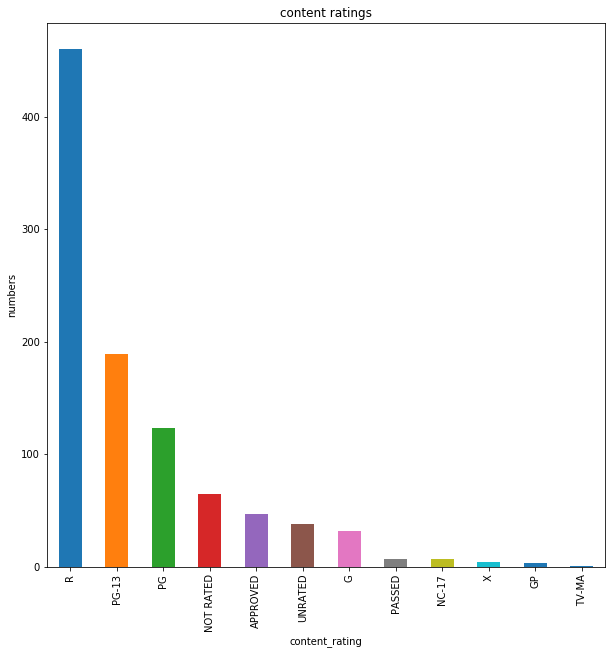

In [16]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar', figsize=(10,10));
plt.xlabel('content_rating')
plt.ylabel('numbers')
plt.title('content ratings')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [17]:
# Answer:
movies.content_rating.replace("NOT RATED", "UNRATED", inplace = True)
movies.content_rating.replace("APPROVED", "UNRATED", inplace = True)
movies.content_rating.replace("PASSED", "UNRATED", inplace = True)
movies.content_rating.replace("GP", "UNRATED", inplace = True)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [18]:
# Answer:
movies.content_rating.replace("X", "NC-17", inplace = True)
movies.content_rating.replace("TV-MA", "NC-17", inplace = True)

#### Count the number of missing values in each column.

In [19]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [20]:
# Answer:
movies.content_rating.fillna(value = 'UNRATED', inplace=True)

In [21]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [22]:
# Answer: 
movies[movies.duration >= 120].star_rating.mean()

7.948898678414097

In [23]:
movies[movies.duration < 120].star_rating.mean()

7.838666666666665

#### Use a visualization to detect whether there is a relationship between duration and star rating.

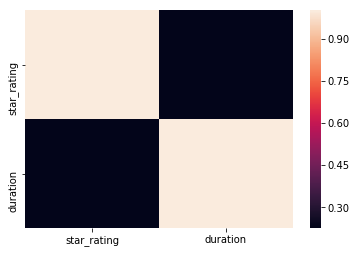

In [24]:
# Answer:
sns.heatmap(movies.corr())

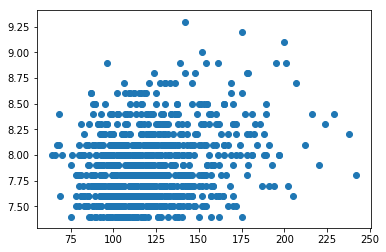

In [25]:
plt.scatter(movies.duration,movies.star_rating)

#### Calculate the average duration for each genre.

In [41]:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [26]:
# Answer:
movies.genre.value_counts()
genres = ['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery','Western','Sci-Fi','Thriller','Film-Noir','Family','History','Fantasy']
for i in genres:
    print(i+':',movies[movies['genre'] == i].duration.mean())

Drama: 126.53956834532374
Comedy: 107.6025641025641
Action: 126.48529411764706
Crime: 122.29838709677419
Biography: 131.84415584415584
Adventure: 134.84
Animation: 96.59677419354838
Horror: 102.51724137931035
Mystery: 115.625
Western: 136.66666666666666
Sci-Fi: 109.0
Thriller: 114.2
Film-Noir: 97.33333333333333
Family: 107.5
History: 66.0
Fantasy: 112.0


## Advanced level

#### Visualize the relationship between content rating and duration.

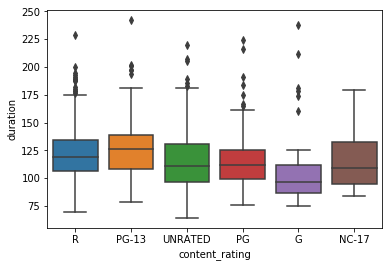

In [27]:
# Answer:
sns.boxplot(movies.content_rating,movies.duration)

#### Determine the top rated movie (by star rating) for each genre.

In [28]:
# Answer:
for i in genres:
    print(i+':',movies.loc[movies[movies['genre'] == i].star_rating.sort_values(ascending = False).head(1).index]['title'])


Drama: 5    12 Angry Men
Name: title, dtype: object
Comedy: 25    Life Is Beautiful
Name: title, dtype: object
Action: 3    The Dark Knight
Name: title, dtype: object
Crime: 0    The Shawshank Redemption
Name: title, dtype: object
Biography: 8    Schindler's List
Name: title, dtype: object
Adventure: 7    The Lord of the Rings: The Return of the King
Name: title, dtype: object
Animation: 30    Spirited Away
Name: title, dtype: object
Horror: 39    Psycho
Name: title, dtype: object
Mystery: 38    Rear Window
Name: title, dtype: object
Western: 6    The Good, the Bad and the Ugly
Name: title, dtype: object
Sci-Fi: 145    Blade Runner
Name: title, dtype: object
Thriller: 350    Shadow of a Doubt
Name: title, dtype: object
Film-Noir: 105    The Third Man
Name: title, dtype: object
Family: 468    E.T. the Extra-Terrestrial
Name: title, dtype: object
History: 338    Battleship Potemkin
Name: title, dtype: object
Fantasy: 638    The City of Lost Children
Name: title, dtype: object


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [59]:
# Answer:
movies[movies.title.duplicated()].title

482    The Girl with the Dragon Tattoo
905                            Dracula
924                     Les Miserables
936                          True Grit
Name: title, dtype: object

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [30]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [31]:
# Answer:
genres = ['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']
for i in genres:
    print(i+':',movies[movies['genre'] == i].star_rating.mean())

Drama: 7.902517985611511
Comedy: 7.822435897435897
Action: 7.884558823529411
Crime: 7.916935483870966
Biography: 7.86233766233766
Adventure: 7.933333333333334
Animation: 7.914516129032257
Horror: 7.806896551724138
Mystery: 7.975


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [33]:
# Answer:
genres_auto = []
count = 0
for i in movies.genre.value_counts().index: # filtering the list
    if movies.genre.value_counts().values[count] < 10: # if the number of movie with specific genre less than 10, ignores it
        pass
    else:
        genres_auto.append(i)
    count+=1
        
for i in genres_auto: # get means of filtered list
    print(i+':',movies[movies['genre'] == i].star_rating.mean())

Drama: 7.902517985611511
Comedy: 7.822435897435897
Action: 7.884558823529411
Crime: 7.916935483870966
Biography: 7.86233766233766
Adventure: 7.933333333333334
Animation: 7.914516129032257
Horror: 7.806896551724138
Mystery: 7.975


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [39]:
# Answer: ??

#### Option 4: aggregate by count and mean, then filter using the count

In [40]:
# Answer: ??


## Bonus

#### Figure out something "interesting" using the actors data!

In [36]:
movies.actors_list.value_counts()

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']                   6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']                     3
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                             2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']                2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']               2
[u'Humphrey Bogart', u'Ingrid Bergman', u'Paul Henreid']                 1
[u'Susan Sarandon', u'Sean Penn', u'Robert Prosky']                      1
[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']                       1
[u'Johnny Depp', u'Kate Winslet', u'Julie Christie']                     1
[u'Asa Butterfield', u'David Thewlis', u'Rupert Friend']                 1
[u'Kang-ho Song', u'Ha-kyun Shin', u'Doona Bae']                         1
[u'Denzel Washington', u'Russell Crowe', u'Chiwetel Ejiofor']            1
[u'Riisa Naka', u'Takuya Ishida', u'Mitsutaka Itakura']                  1
[u'Ben Whishaw', u'Dustin